In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# If you are using Jupyter Notebook or Google Colab, you might also often use:
%matplotlib inline

print("Modules imported successfully!")


# Load the data from the uploaded Excel file
file_path = './VSM_BRIMS.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

/Users/siyuwu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Modules imported successfully!


,participant,trial,decision_type,choice
0,0,0,0,1.0
1,0,1,1,1.0
2,0,2,0,1.0
3,0,3,0,1.0
4,0,4,0,1.0


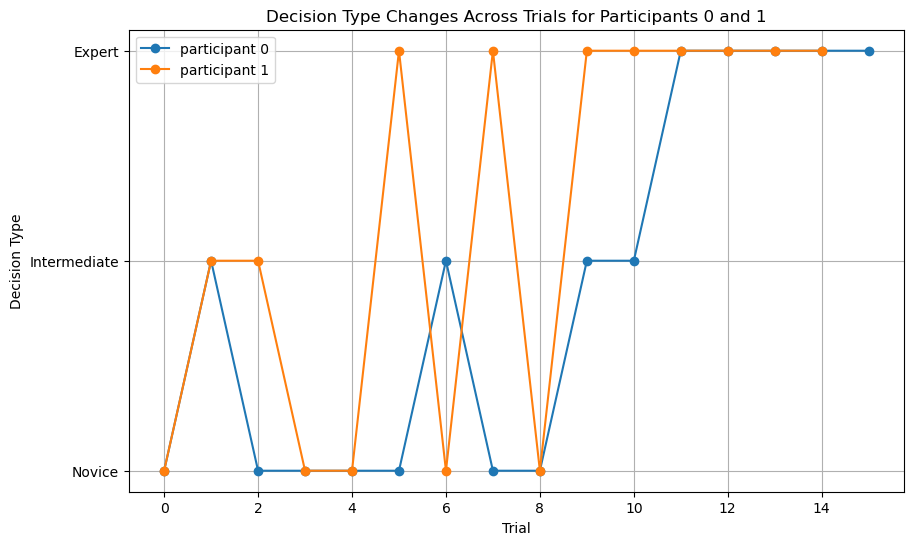

In [2]:
# Plotting the decision type changes across 15 trials for two example participants (0 and 1)
fig, ax = plt.subplots(figsize=(10, 6))

# Select data for participants 0 and 1
for participant in [0, 1]:
    participant_data = data[data['participant'] == participant]
    ax.plot(participant_data['trial'], participant_data['decision_type'], marker='o', linestyle='-', label=f'participant {participant}')

# Setting plot attributes
ax.set_xlabel('Trial')
ax.set_ylabel('Decision Type')
ax.set_title('Decision Type Changes Across Trials for Participants 0 and 1')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['Novice', 'Intermediate', 'Expert'])
ax.legend()

# Show the plot
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import statsmodels.formula.api as smf


# Convert columns to appropriate types
data['participant'] = data['participant'].astype('category')
data['trial'] = data['trial'].astype(int)
data['decision_type'] = data['decision_type'].astype(int)

# Fit a mixed-effects logistic regression model
model = smf.mixedlm("decision_type ~ trial", data, groups=data["participant"])
result = model.fit()

# Print the summary of the model
print(result.summary())


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decision_type
No. Observations: 166     Method:             REML         
No. Groups:       11      Scale:              0.4305       
Min. group size:  15      Log-Likelihood:     -177.8519    
Max. group size:  16      Converged:          Yes          
Mean group size:  15.1                                     
------------------------------------------------------------
              Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     0.210     0.143   1.464  0.143  -0.071   0.490
trial         0.123     0.012  10.504  0.000   0.100   0.146
Group Var     0.104     0.093                               



In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Sample data preparation (assuming your data is in a DataFrame called data)
# Ensure data types are correct
data['participant'] = data['participant'].astype('category')
data['trial'] = data['trial'].astype(int)

# Check and handle missing values in decision_type
data['decision_type'] = data['decision_type'].fillna(0).astype(int)

# Ordered logistic regression model without adding a constant
model = OrderedModel(data['decision_type'], 
                     data[['trial']], 
                     distr='logit')

result = model.fit(method='bfgs', disp=False)

print(result.summary())


                             OrderedModel Results                             
Dep. Variable:          decision_type   Log-Likelihood:                -133.42
Model:                   OrderedModel   AIC:                             272.8
Method:            Maximum Likelihood   BIC:                             282.2
Date:                Tue, 28 May 2024                                         
Time:                        11:24:48                                         
No. Observations:                 166                                         
Df Residuals:                     163                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trial          0.3252      0.046      7.103      0.000       0.236       0.415
0/1            1.5651      0.358      4.371      0.0